# Tip Prediction Using Polynomial Features

In [216]:
## Import Package
import sklearn #scikit-learn
import statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [217]:
## Import Dataset
df_tips=sns.load_dataset('tips')
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<hr>

## SIMPLE LINEAR REGRESSION

### QUICK TASK
- Build Simple Linear Regression with Total Bill as *feature* dan Tip as *target*
- Perform Error Analysis
- Use Histogram to see distribution of Error

In [218]:
## Import package
from sklearn import linear_model

In [219]:
## Build Model and fit into feature and target
Model=linear_model.LinearRegression()
Model.fit(df_tips[['total_bill']],df_tips['tip'])

LinearRegression()

In [220]:
## Define tip target and append to DataFrame
df_tips['target_tip']=Model.predict(df_tips[['tip']]).round(2)
df_tips['selisih']=abs(df_tips['tip']-df_tips['target_tip'])
df_tips['selisih(%)']=(df_tips['selisih']/df_tips['tip']*100).round(2)
df_tips

,total_bill,tip,sex,smoker,day,time,size,target_tip,selisih,selisih(%)
0,16.99,1.01,Female,No,Sun,Dinner,2,1.03,0.02,1.98
1,10.34,1.66,Male,No,Sun,Dinner,3,1.09,0.57,34.34
2,21.01,3.50,Male,No,Sun,Dinner,3,1.29,2.21,63.14
3,23.68,3.31,Male,No,Sun,Dinner,2,1.27,2.04,61.63
4,24.59,3.61,Female,No,Sun,Dinner,4,1.30,2.31,63.99
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.54,4.38,73.99
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1.13,0.87,43.50
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1.13,0.87,43.50
242,17.82,1.75,Male,No,Sat,Dinner,2,1.10,0.65,37.14


In [221]:
## Check Mean of Error
df_tips['selisih'].mean()

1.7636475409836068

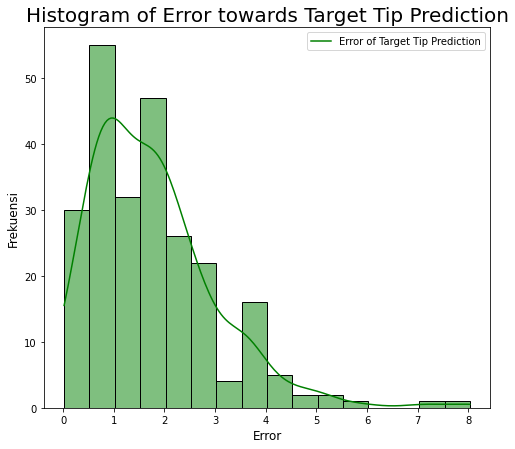

In [222]:
## Use Histogram to visualize distribution of Error
plt.figure(figsize=(8,7))
sns.histplot(df_tips['selisih'],bins=16,color='green',kde=True)
plt.title('Histogram of Error towards Target Tip Prediction',size=20)
plt.xlabel('Error',size=12)
plt.ylabel('Frekuensi',size=12)
plt.legend(['Error of Target Tip Prediction'],loc=0)
plt.show()
## Result: Error did not normally distributed, normally we expect good Model have normally distributed Error

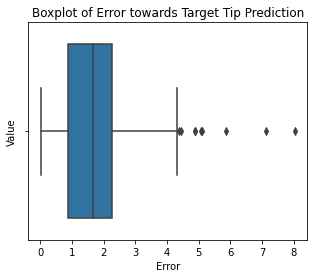

In [223]:
## Use Boxplot to visualize outliers of error
plt.figure(figsize=(5,4))
sns.boxplot(df_tips['selisih'])
plt.title('Boxplot of Error towards Target Tip Prediction')
plt.xlabel('Error')
plt.ylabel('Value')
plt.show()
## Result: Error (predicted tip - actual tip) above 4.0 categorize as outliers and affect prediction result of tip 

<hr>

## MULTIPLE LINEAR REGRESSION

### Data Understanding

In [224]:
## Re-Import Dataset
df_tips=sns.load_dataset('tips')
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [225]:
## Describe Every Columns
TipsDesc=[]
for i in df_tips.columns:
    TipsDesc.append([
        i,
        df_tips[i].dtypes,
        df_tips[i].isna().sum(),
        round((df_tips[i].isna().sum()/len(df_tips))*100,2),
        df_tips[i].nunique(),
        df_tips[i].drop_duplicates().sample(2).values
    ])
pd.DataFrame(data=TipsDesc,columns=['Features','DataType','Null','Null(%)','Unique','UniqueSample'])
## Result: No missing value, 7 total columns, 3 numeric columns, 4 categorical columns

,Features,DataType,Null,Null(%),Unique,UniqueSample
0,total_bill,float64,0,0.0,229,"[16.21, 9.78]"
1,tip,float64,0,0.0,123,"[2.72, 3.92]"
2,sex,category,0,0.0,2,"['Female', 'Male'] Categories (2, object): ['M..."
3,smoker,category,0,0.0,2,"['Yes', 'No'] Categories (2, object): ['Yes', ..."
4,day,category,0,0.0,4,"['Sun', 'Fri'] Categories (4, object): ['Thur'..."
5,time,category,0,0.0,2,"['Dinner', 'Lunch'] Categories (2, object): ['..."
6,size,int64,0,0.0,6,"[3, 6]"


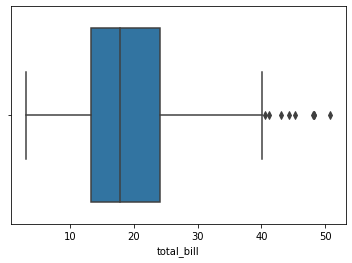

In [226]:
## Check Outliers Total Bill
sns.boxplot(df_tips['total_bill'])
plt.show()
## Result: There are outliers

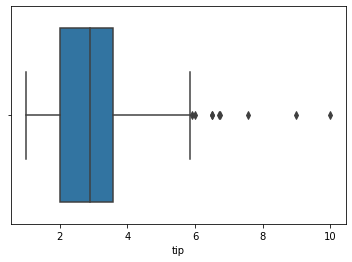

In [227]:
## Check Outliers Tip
sns.boxplot(df_tips['tip'])
plt.show()
## Result: There are outliers

### FEATURE SELECTION
    - Because there are only 2 features columns and both of them have quite appropriate correlation to tip, therefore we use both of them as the features.

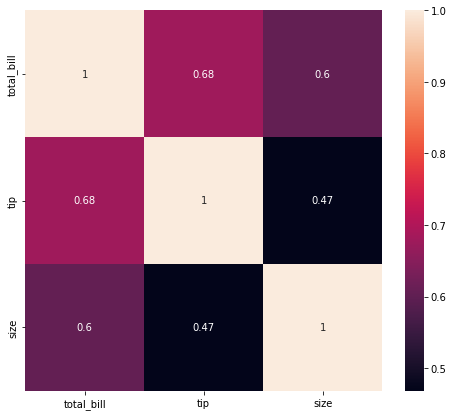

In [228]:
## Correlation Test with HeatMap
plt.figure(figsize=(8,7))
sns.heatmap(df_tips.corr('spearman'),annot=True)
plt.show()
## Result: Use spearman (outliers detected), we only analyze correlation all columns with 'tip'.

### Machine Learning

#### Splitting Dataset

In [229]:
# Define features and target
df=df_tips[['total_bill','tip','size']]
x=df.drop(columns='tip')
y=df['tip']

In [230]:
# Import package
from sklearn.model_selection import train_test_split

In [231]:
# Use package to randomly split data into training data and testing data with 80%:20% proportion
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2) 

In [232]:
## Question for Mock-Up Test
x_train.head()

,total_bill,size
196,10.34,2
158,13.39,2
231,15.69,3
109,14.31,2
175,32.90,2


In [233]:
## Question for Real Test
x_train.head()

,total_bill,size
196,10.34,2
158,13.39,2
231,15.69,3
109,14.31,2
175,32.90,2


In [234]:
## Define shape of x_train
x_train.shape

(195, 2)

In [235]:
## Define shape of x_test
x_test.shape

(49, 2)

In [236]:
## Question for Real Test
x_test.head()

,total_bill,size
28,21.70,2
47,32.40,4
99,12.46,2
169,10.63,2
120,11.69,2


In [237]:
## Answer Key for Mock-Up Test
y_train.head()

196    2.00
158    2.61
231    3.00
109    4.00
175    3.11
Name: tip, dtype: float64

In [238]:
## Answer Key for Real Test
y_test.head()

28     4.30
47     6.00
99     1.50
169    2.00
120    2.31
Name: tip, dtype: float64

#### Machine Learning Modelling

In [239]:
## Import package
from sklearn.linear_model import LinearRegression

In [240]:
## Define Model
Model = LinearRegression(fit_intercept=False)
## Target (tip) is certainly has zero value when total bill or restaurant size is 0

In [241]:
# Learning Mode -> finding pattern from question-answer of Training Data
Model.fit(x_train,y_train)

LinearRegression(fit_intercept=False)

In [242]:
## QUICK EVALUATION MATRIX - Training Data
print(f'Quick Evaluation Matrix Value for Training Data= {Model.score(x_train,y_train)}')
# Check Evaluation Matrix score of Training Data

Quick Evaluation Matrix Value for Training Data= 0.4515071765712706


In [243]:
## QUICK EVALUATION MATRIX - Testing Data
print(f'Quick Evaluation Matrix Value for Testing Data= {Model.score(x_test,y_test)}')
# Check Evaluation Matrix score of Testing Data

Quick Evaluation Matrix Value for Testing Data= 0.3781558677310617


In [244]:
## Answer Key for Training Question
Model.predict(x_train)

array([1.72191026, 2.03880292, 2.60156725, 2.13439021, 4.06587693,
       4.54374388, 2.65559485, 4.86070606, 3.27416479, 2.68921211,
       2.82116413, 2.04191989, 1.92139678, 2.20711967, 1.76658693,
       4.78375111, 1.80814662, 1.21525151, 3.39157092, 3.51899747,
       3.20173531, 2.04191989, 5.03897371, 2.41284015, 1.89646097,
       4.89529279, 3.34236877, 2.70583599, 2.54687016, 1.51515079,
       2.3515396 , 3.00298779, 4.2456226 , 1.9733464 , 2.05127082,
       2.63793198, 1.95048857, 2.29023906, 4.42670725, 2.90806998,
       1.53281366, 4.08799576, 2.35673457, 3.44485951, 4.12124351,
       2.66739327, 3.13597881, 2.46167279, 3.79707791, 2.01178912,
       3.00848274, 2.17802789, 2.15620905, 1.45177226, 3.34927222,
       1.82996546, 2.54790915, 2.50634946, 2.3380327 , 4.58982905,
       2.49907651, 2.91534293, 2.04466737, 1.95672252, 1.55878846,
       3.07156128, 5.31920166, 2.08244059, 4.75325083, 1.82684848,
       3.52901789, 2.70687498, 2.46686775, 4.91191667, 2.30997

In [245]:
## Answer Key for Test Question
Model.predict(x_test)

array([2.90220553, 4.66151952, 1.94217663, 1.75204104, 1.86217422,
       3.21004725, 2.79897579, 5.24439421, 3.78980496, 3.01233872,
       3.16922656, 4.45372105, 2.63169803, 2.01490609, 2.39517728,
       1.65333677, 4.40488841, 3.73406888, 1.7167153 , 2.50946644,
       5.46881655, 1.68035057, 2.11776633, 2.67258823, 4.95867132,
       2.35465658, 3.42823563, 2.73455827, 2.2434844 , 2.10945439,
       4.69409778, 2.18841781, 2.18322285, 2.85715936, 2.25595231,
       1.40086163, 2.027374  , 2.62998955, 3.01129973, 4.91399465,
       3.95678274, 2.91326495, 1.97126842, 2.83051506, 2.94584321,
       3.37146056, 3.89822967, 1.24501278, 1.63982987])

In [246]:
# Y = Z + aTotal_bill + bSize
print(f'Constanta value (Z)= {Model.intercept_}') # will be 0 because fit_intercept=False
print(f'a and b value= {Model.coef_}')
print(f'Features: {x_train.columns}')
pd.DataFrame(data=Model.coef_,index=x_train.columns,columns=['Coef']) ## Coefficient from every columns

Constanta value (Z)= 0.0
a and b value= [0.10389923 0.3237961 ]
Features: Index(['total_bill', 'size'], dtype='object')


,Coef
total_bill,0.103899
size,0.323796


<hr>

### EVALUATION MATRIX

In [247]:
## Variable for Predicted Features in Training Data
pred_train=Model.predict(x_train)

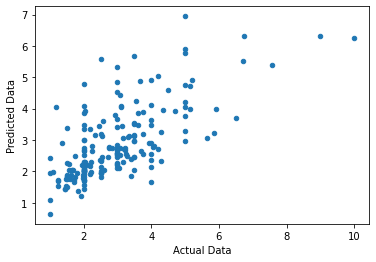

In [248]:
## Visualization with Scatterplot
plt.scatter(y_train,pred_train,s=20)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()

In [249]:
## Variable for Predicted Features in Testing Data
pred_test=Model.predict(x_test)

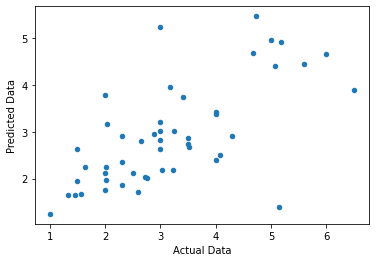

In [250]:
## Visualization with Scatterplot
plt.scatter(y_test,pred_test,s=20)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()

In [251]:
## Combine question and answers as one set
training_set=pd.concat([x_train,y_train],axis=1)
testing_set=pd.concat([x_test,y_test],axis=1)

## Define Error from Predicted and Actual Data
training_set['tip_pred']=pred_train
training_set['error']=abs(training_set['tip']-training_set['tip_pred'])

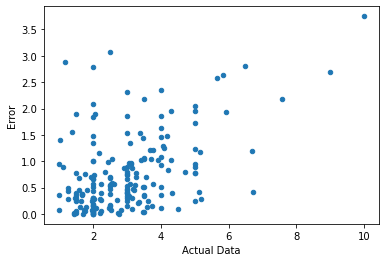

In [252]:
## Visualization
plt.scatter(training_set['tip'],training_set['error'],s=20)
plt.xlabel('Actual Data')
plt.ylabel('Error')
plt.show()

<hr>

### Error Distribution
#### Good model have normally distributed error with mean value of 0

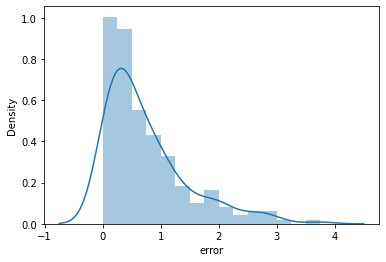

In [253]:
# Visualize Data Distribution with Histogram
sns.distplot(training_set['error'])
plt.show()
# Not Normally Distributed

In [254]:
training_set['error'].mean()
# Mean of error not 0 or close to 0

0.7474991521082626

<hr>

### EVALUATION MATRIX FOR REGRESSION

In [255]:
## Import Package
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [256]:
## MODEL FOR MOCK-UP TEST
pred_train=Model.predict(x_train)

## Calculate Evaluation Matrix with Every Alternatives
r2_train=r2_score(y_train,pred_train)
MAE_train=mean_absolute_error(y_train,pred_train)
MSE_train=mean_squared_error(y_train,pred_train)
RMSE_train=np.sqrt(MSE_train)

## Print Result
print('Evaluation Matrix Result for Training Data:')
print('='*50)
print(f'R-Squared = {r2_train.round(2)}') ## Result: Not as required (0.85)
print(f'Mean Absolute Error = {MAE_train.round(2)}')
print(f'Mean Squared Error = {MSE_train.round(2)}')
print(f'Root Mean Squared Error = {RMSE_train.round(2)}')


Evaluation Matrix Result for Training Data:
R-Squared = 0.45
Mean Absolute Error = 0.75
Mean Squared Error = 1.07
Root Mean Squared Error = 1.04


In [257]:
## MODEL FOR REAL TEST
pred_test=Model.predict(x_test)

## Calculate Evaluation Matrix with Every Alternatives
r2_test=r2_score(y_test,pred_test)
MAE_test=mean_absolute_error(y_test,pred_test)
MSE_test=mean_squared_error(y_test,pred_test)
RMSE_test=np.sqrt(MSE_test)

## Print Result
print('Evaluation Matrix Result for Training Data:')
print('='*50)
print(f'R-Squared = {r2_test.round(2)}')  ## Result: Not as required (0.85)
print(f'Mean Absolute Error = {MAE_test.round(2)}')
print(f'Mean Squared Error = {MSE_test.round(2)}')
print(f'Root Mean Squared Error = {RMSE_test.round(2)}')


Evaluation Matrix Result for Training Data:
R-Squared = 0.38
Mean Absolute Error = 0.72
Mean Squared Error = 1.05
Root Mean Squared Error = 1.02


In [258]:
## Training vs Test
data={
    'Training':[r2_train,MAE_train,MSE_train,RMSE_train],
    'Testing':[r2_test,MAE_test,MSE_test,RMSE_test],
    'Range':['-~ to 1','0 to ~','0 to ~','0 to ~'],
    'Indicator':['Closer to 1 the better','Closer to 0 the better','Closer to 0 the better','Closer to 0 the better']
}
pd.DataFrame(data,index=['R-Squared','MAE','MSE','RMSE']).round(2)

,Training,Testing,Range,Indicator
R-Squared,0.45,0.38,-~ to 1,Closer to 1 the better
MAE,0.75,0.72,0 to ~,Closer to 0 the better
MSE,1.07,1.05,0 to ~,Closer to 0 the better
RMSE,1.04,1.02,0 to ~,Closer to 0 the better


<hr>

### IMPROVEMENT MACHINE LEARNING
#### Project Limitation / Feature Engineering

In [259]:
# PROJECT LIMITATION
training_set.sort_values('error',ascending=False).head(10)
## Take out 10 data with highest Error, then analyze those errors
### Insight: there is no exact pattern on the error

,total_bill,size,tip,tip_pred,error
170,50.81,3,10.00,6.250508,3.749492
102,44.30,3,2.50,5.574124,3.074124
237,32.83,2,1.17,4.058604,2.888604
183,23.17,4,6.50,3.702530,2.797470
187,30.46,5,2.00,4.783751,2.783751
212,48.33,4,9.00,6.316634,2.683366
88,24.71,2,5.85,3.214942,2.635058
181,23.33,2,5.65,3.071561,2.578439
178,9.60,2,4.00,1.645025,2.354975
207,38.73,4,3.00,5.319202,2.319202


### Encoding

In [260]:
## Determine Categorical Columns
df_tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [261]:
## Define unique value and its frequency in column 'sex'
df_tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [262]:
## Encode every gender type into numeric value
df_tips['gender_enc']=df_tips['sex'].map({'Male':1,'Female':2})
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,gender_enc
0,16.99,1.01,Female,No,Sun,Dinner,2,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,2


In [263]:
## Define unique value and its frequency in column 'smoker'
df_tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [264]:
## Encode every smoker type into numeric value
df_tips['smoker_enc']=df_tips['smoker'].map({'No':0,'Yes':1})
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,gender_enc,smoker_enc
0,16.99,1.01,Female,No,Sun,Dinner,2,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0
4,24.59,3.61,Female,No,Sun,Dinner,4,2,0


In [265]:
## Define unique value and its frequency in column 'day'
df_tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [266]:
## Encode every day type into numeric value
df_tips['day_enc']=df_tips['day'].map({'Thur':1,'Fri':2,'Sat':3,'Sun':4})
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,gender_enc,smoker_enc,day_enc
0,16.99,1.01,Female,No,Sun,Dinner,2,2,0,4
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,4
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,4
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,4
4,24.59,3.61,Female,No,Sun,Dinner,4,2,0,4


In [267]:
## Define unique value and its frequency in column 'time'
df_tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [268]:
## Encode every day type into numeric value
df_tips['time_enc']=df_tips['time'].map({'Lunch':0,'Dinner':1})
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,gender_enc,smoker_enc,day_enc,time_enc
0,16.99,1.01,Female,No,Sun,Dinner,2,2,0,4,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,4,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,4,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,4,1
4,24.59,3.61,Female,No,Sun,Dinner,4,2,0,4,1


In [269]:
## Convert all encoded columns into integer
df_tips['gender_enc']=df_tips['gender_enc'].astype('int64')
df_tips['smoker_enc']=df_tips['smoker_enc'].astype('int64')
df_tips['day_enc']=df_tips['day_enc'].astype('int64')
df_tips['time_enc']=df_tips['time_enc'].astype('int64')
df_tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
gender_enc       int64
smoker_enc       int64
day_enc          int64
time_enc         int64
dtype: object

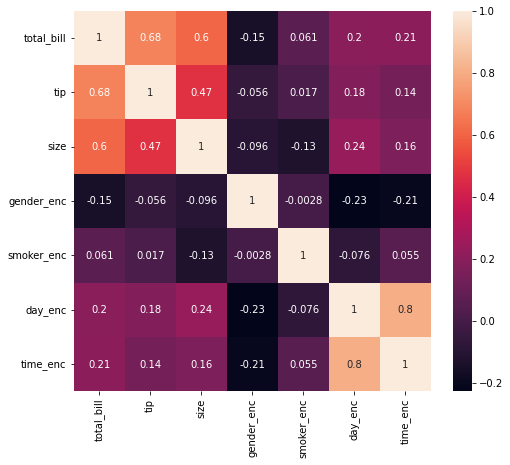

In [270]:
## Correlation Test with HeatMap
plt.figure(figsize=(8,7))
sns.heatmap(df_tips.corr('spearman'),annot=True)
plt.show()
## Result: Use spearman (outliers detected), we only analyze correlation all columns with 'tip'.
### Gender, smoker, day, and time has low correlation to tips, cannot be used for machine learning.

- Insight:
    - Encoding is not feasible because all other columns were not reliable to be selected as features

<hr>

## `POLYNOMIAL FEATURES`

In [271]:
## Import Package
from sklearn.preprocessing import PolynomialFeatures

In [272]:
## Check features value
x_train.head()

,total_bill,size
196,10.34,2
158,13.39,2
231,15.69,3
109,14.31,2
175,32.90,2


In [273]:
## Let Model learn/see question for Mock Up Test to learn the pattern
Poli=PolynomialFeatures(degree=2,include_bias=False,interaction_only=True)
Poli=Poli.fit(x_train) 
# fit training data only, because Model may not see testing data
# interaction_only=True -> x^1 * x^2
## data leakage = when Model accidentally see/learn/know condition of testing data

## Assign transformed training set into variables
x_train_poli=Poli.transform(x_train)
x_test_poli=Poli.transform(x_test)

In [274]:
## Assign Question for Mock Up Test with Poly Model into Variable
df_x_train_poli=pd.DataFrame(x_train_poli)
df_x_train_poli.head()

,0,1,2
0,10.34,2.0,20.68
1,13.39,2.0,26.78
2,15.69,3.0,47.07
3,14.31,2.0,28.62
4,32.90,2.0,65.80


In [275]:
## Assign Answer for Mock Up Test with Poly Model into Variable
df_x_test_poli=pd.DataFrame(x_test_poli)
df_x_test_poli.head()

,0,1,2
0,21.70,2.0,43.40
1,32.40,4.0,129.60
2,12.46,2.0,24.92
3,10.63,2.0,21.26
4,11.69,2.0,23.38


In [276]:
## Build Model
Model_Poli=LinearRegression()
Model_Poli.fit(x_train_poli,y_train)

LinearRegression()

In [277]:
## Assign answer for Mock Up Test and Real Test to variable
Poli_train=Model_Poli.predict(x_train_poli)
Poli_test=Model_Poli.predict(x_test_poli)

In [278]:
## POLYNOMIAL FEATURE TRAINING SET
## Calculate Evaluation Matrix with Every Alternatives
r2_Poly_Train=r2_score(y_train,Poli_train)
MAE_Poly_Train=mean_absolute_error(y_train,Poli_train)
MSE_Poly_Train=mean_squared_error(y_train,Poli_train)
RMSE_Poly_Train=np.sqrt(MSE_Poly_Train)

## POLYNOMIAL FEATURE TESTING SET
## Calculate Evaluation Matrix with Every Alternatives
r2_Poly_Test=r2_score(y_test,Poli_test)
MAE_Poly_Test=mean_absolute_error(y_test,Poli_test)
MSE_Poly_Test=mean_squared_error(y_test,Poli_test)
RMSE_Poly_Test=np.sqrt(MSE_Poly_Test)

## BASE vs POLYNOMIAL
ev_matrix={
    'LinRegTrain':[r2_train,MAE_train,MSE_train,RMSE_train],
    'LinRegTest':[r2_test,MAE_test,MSE_test,RMSE_test],
    'PolyTrain':[r2_Poly_Train,MAE_Poly_Train,MSE_Poly_Train,RMSE_Poly_Train],
    'PolyTest':[r2_Poly_Test,MAE_Poly_Test,MSE_Poly_Test,RMSE_Poly_Test],
    'Range':['-~ to 1','0 to ~','0 to ~','0 to ~'],
    'Indicator':['Closer to 1 the better','Closer to 0 the better','Closer to 0 the better','Closer to 0 the better']
}
pd.DataFrame(ev_matrix,index=['R-Squared','MAE','MSE','RMSE']).round(2)

,LinRegTrain,LinRegTest,PolyTrain,PolyTest,Range,Indicator
R-Squared,0.45,0.38,0.48,0.41,-~ to 1,Closer to 1 the better
MAE,0.75,0.72,0.74,0.73,0 to ~,Closer to 0 the better
MSE,1.07,1.05,1.02,0.99,0 to ~,Closer to 0 the better
RMSE,1.04,1.02,1.01,0.99,0 to ~,Closer to 0 the better


## Analysis
- Good Model expected to score above 0.80 for both training and testing, while good training score but bad testing score indicates an overfitting Model.
- After using Polynomial Featues, R-Squared for training set and testing set are still below 0.5 (not ideal).
- Even with Polynomial Features this Model still did not produce ideal R-Squared score, this model is underfitting.
- Scores for all evaluation matrix methods on training set show little improvement as MAE, MSE, RMSE all scored closer to 0 (ideal result). 